<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana6/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificar de cachorros e gatos**
* dataset contendo imagens de cães e gatos
* o objetivo é diferenciar imagens de cães e gatos
* existem apenas duas classificações possíveis:
  * cachorro
  * gato
* [Cats and Dogs](https://www.kaggle.com/tongpython/cat-and-dog) 
* problema de deep learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **1. Importando bibliotécas**

In [ ]:
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt
import os

from sklearn.metrics import accuracy_score

from keras import preprocessing
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

## **2. Lendo imagens**


In [ ]:
#lendo imagem
img = cv2.imread('/content/drive/My Drive/AMP/semana6/archive/test_set/cats/cat.4001.jpg')

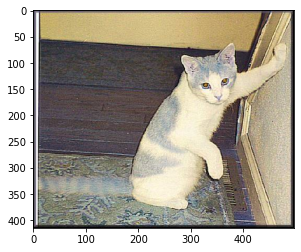

In [ ]:
# mostrando imagem de gato como exemplo
plt.imshow(img)
plt.show()

**Lendo todas as imagens**

In [ ]:
# criando path para as imagens
input_dir = '/content/drive/My Drive/AMP/semana6/archive/'

In [ ]:
# tipo = train ou test

classes = {'cats': 0, 'dogs': 1}

def resize(img):
  imgR = cv2.resize(img, (350, 350))
  return imgR
  
def ler_dataset(tipo, qtd):
  X = []
  y = []

  if tipo == 'train':
    tipo = 'training_set'
  elif tipo == 'test':
    tipo = 'test_set'

  # para cada pasta
  for pasta in os.listdir(input_dir+tipo+'/'):
    # para cada imagem na pasta
    for img_file in os.listdir(input_dir+tipo+'/'+pasta+'/')[:qtd//2]:
      # leia a imagem
      img = cv2.imread(input_dir+tipo+'/'+pasta+'/'+img_file)
      # redimensiona a imagem para um tamanho de 350x350px
      img = resize(img)
      # transforme imagem em array de pixels e salve na lista de imagens
      X.append(img)
      # guarde a classificação da imagem
      y.append(classes[pasta])
  X = np.asarray(X)
  y = np.asarray(y)
  return X, y



---


Irei redimensionar as imagens para 350x350 em treino e teste, pois é preciso de padronização para usar o modelo. Eu não irei cortar as imagens pelas bordas, centralizando o cachorro ou o gato da imagem, pois o modelo precisa aprender a reconhecer o fundo e os objetos que não são nem cachorro e nem gato.


---



In [ ]:
# separando método de treino
# serão 1000 instâncias, 500 de cachorros e 500 de gatos, para o treino
x_treino, y_treino = ler_dataset('train', 1000)

In [ ]:
# mostrando x_treino 
x_treino

array([[[[  4,   0,   5],
         [  3,   0,   4],
         [  1,   0,   2],
         ...,
         [ 65,  79,  68],
         [ 94, 108,  97],
         [186, 200, 189]],

        [[  4,   0,   5],
         [  1,   0,   4],
         [  1,   0,   2],
         ...,
         [ 63,  77,  66],
         [ 97, 111, 100],
         [185, 199, 188]],

        [[  2,   1,   3],
         [  1,   0,   2],
         [  1,   0,   2],
         ...,
         [ 61,  75,  64],
         [104, 118, 107],
         [181, 195, 184]],

        ...,

        [[132, 144, 148],
         [133, 145, 149],
         [136, 147, 151],
         ...,
         [173, 185, 191],
         [171, 183, 189],
         [169, 181, 187]],

        [[133, 145, 149],
         [133, 145, 149],
         [136, 148, 152],
         ...,
         [178, 190, 196],
         [178, 190, 196],
         [175, 187, 193]],

        [[132, 144, 148],
         [132, 144, 148],
         [135, 147, 151],
         ...,
         [177, 189, 193],
        

In [ ]:
# mostrando as informações das instâncias de treino
x_treino.shape

(1000, 350, 350, 3)

In [ ]:
# mostrando as informações das labels
y_treino.shape

(1000,)

In [ ]:
# separando arquivos de teste
# serão 200 instâncias, 100 de cachorros e 100 de gatos, para o treino
x_teste, y_teste = ler_dataset('test', 200)

In [ ]:
# transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 2)
y_teste = to_categorical(y_teste, num_classes = 2)

In [ ]:
# mostrando as informações das instâncias de treino
x_teste.shape

(200, 350, 350, 3)

In [ ]:
# mostrando as informações das labels
y_teste.shape

(200, 2)

## **3. Reescala dos dados**

In [ ]:
x_treino = x_treino/255

In [ ]:
x_teste = x_teste/255

## **4. Definindo CNN**

In [ ]:
#definição do modelo
model = Sequential()

# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (350,350,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  2 camadas fully conected 
model.add(Flatten()) #converte os mapas de ativação finais para um veter de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
# definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Descrição do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 350, 350, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 350, 350, 32)      25632     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 350, 350, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 175, 175, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 175, 175, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 175, 175, 64)      3

In [ ]:
# treinamento do modelo
model.fit(x_treino, y_treino, epochs=1,verbose = 1)

32/32 [==============================] - 2031s 63s/step - loss: 10.5885 - accuracy: 0.5070


In [ ]:
# teste
classificacao = model.predict(x_teste)

## **5. Avaliação do modelo**

In [ ]:
model.evaluate(x_teste,y_teste)

7/7 [==============================] - 81s 12s/step - loss: 0.6932 - accuracy: 0.5000


[0.693195641040802, 0.5]

## **Conclusão**


O modelo conseguiu 50% de acurácia com 1000 instâncias de treino. É, provavelmente, possível aumentar esse número pelos seguintes métodos:


* Adicionar mais imagens para treino
* Melhorar configuração do algoritmo
  * Aumentar épocas de treino
  * Configurar as layers do algoritmo

Eu não adicionei mais imagens ou aumentei a quantidade de épocas de treino do algoritmo porque, em ambos os casos, ocorriam estouro de memória ram, que resetava todo o kernel do google colab. Isso acontece, pois, quando reescalamos a matriz de treino e teste, usando uma operação de divição, os números ficam em float, que consomem um maior número de bytes aumentando, portanto, a quantidade de ram necessária. 

Para contonar o problema anterior e testar uma das hipoteses, aumentarei ao máximo possível o número de imagens de treino e teste, deixando de lado a reescala, e observar o efeito na acurácia.



## **Testando sem reescala**

### **Preparando dados**

In [ ]:
# separando método de treino
# serão 3000 instâncias para treino, 1500 de cachorros e 1500 de gatos
x_treino, y_treino = ler_dataset('train', 3000)

In [ ]:
# separando método de treino
# serão 600 instâncias para teste, 300 de cachorros e 300 de gatos
x_teste, y_teste = ler_dataset('test', 600)

In [ ]:
# transformando labels de numérico para categórico
y_treino = to_categorical(y_treino, num_classes = 2)
y_teste = to_categorical(y_teste, num_classes = 2)

### **Definindo CNN**

In [ ]:
#definição do modelo
model = Sequential()

# 2 camadas de convolução de 32 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (350,350,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 64 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# 2 camadas de convolução de 128 filtros + Max pooling [2,2]
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#  2 camadas fully conected 
model.add(Flatten()) #converte os mapas de ativação finais para um veter de 1 dimensão
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
# definindo o algoritmo otmizador
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compilando o modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Descrição do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 350, 350, 32)      2432      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 350, 350, 32)      25632     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 350, 350, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 175, 175, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 175, 175, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 175, 175, 64)      18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 175, 175, 64)     

In [ ]:
# treinamento do modelo
model.fit(x_treino, y_treino, epochs=1,verbose = 1)

94/94 [==============================] - 6195s 66s/step - loss: 30.5592 - accuracy: 0.5020


In [ ]:
# avaliando modelo
model.evaluate(x_teste,y_teste)

19/19 [==============================] - 272s 14s/step - loss: 0.6905 - accuracy: 0.5433


[0.6904619336128235, 0.5433333516120911]

### **Conclusão**

Após aumentar a quantidade de imagens para treino e teste, foi gerada uma acurácia de 54%, provando, portanto, que mesmo sem reescala, se usar muitas instâncias para treino, a acurácia irá aumentar.

É possível afirmar que se Aumentássemos a quantidade de épocas de treino o vaolr da acurácia também aumentaria. Mais testes são necessários.